# Imports used for all the code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP



from mpl_toolkits.mplot3d import Axes3D

# Reading in all the files and storing in data frames

In [2]:
collegeData = 'DataMining Sets/College_Data.csv'
salaryRegion = 'DataMining Sets/salaries-by-region.csv'
salaryCollege = 'DataMining Sets/salaries-by-college-type.csv'
degreePay = 'DataMining Sets/degrees-that-pay-back.csv'

collegeDf = pd.read_csv(collegeData)
regionDf = pd.read_csv(salaryRegion)
salaryDf = pd.read_csv(salaryCollege)
degreeDf = pd.read_csv(degreePay)

# ***College DataFrame***

In [3]:
collegeDf.rename(columns={'Room.Board': 'RoomAndBoard', 'Grad.Rate': 'GradRate'})
collegeDfCopy = collegeDf

In [4]:
collegeDf.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

# ***Region DataFrame***

In [5]:
regionDf = regionDf.fillna(0)

In [6]:
def convert_column(data, columns):
    for column in columns:
        data[column] = data[column].replace({'\$':'', ',':''}, regex=True)
        data[column] = pd.to_numeric(data[column])
    return data

columns_to_modify = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
                     'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

In [7]:
regionDf = convert_column(regionDf, columns_to_modify)
regionDf.head()

School Name      Region  \
0                       Stanford University  California   
1  California Institute of Technology (CIT)  California   
2                       Harvey Mudd College  California   
3        University of California, Berkeley  California   
4                        Occidental College  California   

   Starting Median Salary  Mid-Career Median Salary  \
0                 70400.0                  129000.0   
1                 75500.0                  123000.0   
2                 71800.0                  122000.0   
3                 59900.0                  112000.0   
4                 51900.0                  105000.0   

   Mid-Career 10th Percentile Salary  Mid-Career 25th Percentile Salary  \
0                            68400.0                            93100.0   
1                                0.0                           104000.0   
2                                0.0                            96000.0   
3                            59500.0                            81000.0   
4                                0.0                            54800.0   

   Mid-Career 75th Percentile Salary  Mid-Career 90th Percentile Salary  
0                           184000.0                           257000.0  
1                           161000.0                                0.0  
2                           180000.0                                0.0  
3                           149000.0                           201000.0  
4                           157000.0                                0.0

# ***Salary DataFrame***

In [8]:
salaryDf = salaryDf.fillna(0)
salaryDf.head()

School Name  School Type  \
0   Massachusetts Institute of Technology (MIT)  Engineering   
1      California Institute of Technology (CIT)  Engineering   
2                           Harvey Mudd College  Engineering   
3  Polytechnic University of New York, Brooklyn  Engineering   
4                                  Cooper Union  Engineering   

  Starting Median Salary Mid-Career Median Salary  \
0             $72,200.00              $126,000.00   
1             $75,500.00              $123,000.00   
2             $71,800.00              $122,000.00   
3             $62,400.00              $114,000.00   
4             $62,200.00              $114,000.00   

  Mid-Career 10th Percentile Salary Mid-Career 25th Percentile Salary  \
0                        $76,800.00                        $99,200.00   
1                                 0                       $104,000.00   
2                                 0                        $96,000.00   
3                        $66,800.00                        $94,300.00   
4                                 0                        $80,200.00   

  Mid-Career 75th Percentile Salary Mid-Career 90th Percentile Salary  
0                       $168,000.00                       $220,000.00  
1                       $161,000.00                                 0  
2                       $180,000.00                                 0  
3                       $143,000.00                       $190,000.00  
4                       $142,000.00                                 0

In [9]:
def convert_column(data, columns):
    for column in columns:
        data[column] = data[column].replace({'\$':'', ',':''}, regex=True)
        data[column] = pd.to_numeric(data[column])
    return data

columns_to_modify = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
                     'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

In [10]:
salaryDf = convert_column(salaryDf, columns_to_modify)
salaryDf.head()

School Name  School Type  \
0   Massachusetts Institute of Technology (MIT)  Engineering   
1      California Institute of Technology (CIT)  Engineering   
2                           Harvey Mudd College  Engineering   
3  Polytechnic University of New York, Brooklyn  Engineering   
4                                  Cooper Union  Engineering   

   Starting Median Salary  Mid-Career Median Salary  \
0                 72200.0                  126000.0   
1                 75500.0                  123000.0   
2                 71800.0                  122000.0   
3                 62400.0                  114000.0   
4                 62200.0                  114000.0   

   Mid-Career 10th Percentile Salary  Mid-Career 25th Percentile Salary  \
0                            76800.0                            99200.0   
1                                0.0                           104000.0   
2                                0.0                            96000.0   
3                            66800.0                            94300.0   
4                                0.0                            80200.0   

   Mid-Career 75th Percentile Salary  Mid-Career 90th Percentile Salary  
0                           168000.0                           220000.0  
1                           161000.0                                0.0  
2                           180000.0                                0.0  
3                           143000.0                           190000.0  
4                           142000.0                                0.0

# ***Degree DataFrame***

In [11]:
degreeDf = degreeDf.fillna(0)

In [12]:
def convert_column(data, columns):
    for column in columns:
        data[column] = data[column].replace({'\$':'', ',':''}, regex=True)
        data[column] = pd.to_numeric(data[column])
    return data

columns_to_modify = ['Starting Median Salary', 'Mid-Career Median Salary','Mid-Career 10th Percentile Salary',
                      'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

In [13]:
degreeDf = convert_column(degreeDf, columns_to_modify)
degreeDf.head()

Undergraduate Major  Starting Median Salary  Mid-Career Median Salary  \
0             Accounting                 46000.0                   77100.0   
1  Aerospace Engineering                 57700.0                  101000.0   
2            Agriculture                 42600.0                   71900.0   
3           Anthropology                 36800.0                   61500.0   
4           Architecture                 41600.0                   76800.0   

   Percent change from Starting to Mid-Career Salary  \
0                                               67.6   
1                                               75.0   
2                                               68.8   
3                                               67.1   
4                                               84.6   

   Mid-Career 10th Percentile Salary  Mid-Career 25th Percentile Salary  \
0                            42200.0                            56100.0   
1                            64300.0                            82100.0   
2                            36300.0                            52100.0   
3                            33800.0                            45500.0   
4                            50600.0                            62200.0   

   Mid-Career 75th Percentile Salary  Mid-Career 90th Percentile Salary  
0                           108000.0                           152000.0  
1                           127000.0                           161000.0  
2                            96300.0                           150000.0  
3                            89300.0                           138000.0  
4                            97000.0                           136000.0

# ***Clustering and visualizations + random information***

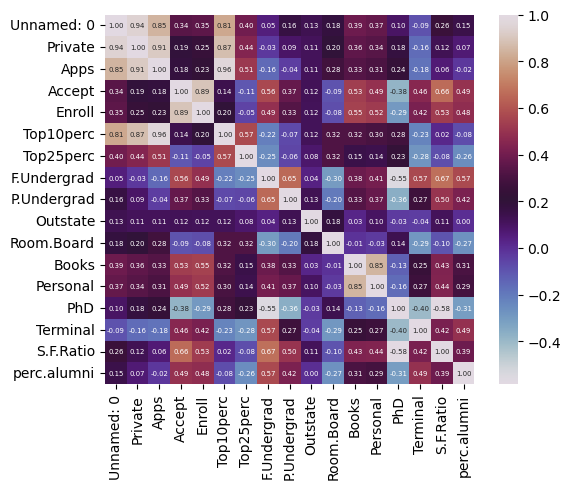

In [14]:
corrmat = collegeDf.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size':5}, 
                 yticklabels=collegeDf.columns[:17], 
                 xticklabels=collegeDf.columns[:17], 
                 cmap="twilight")
plt.show()

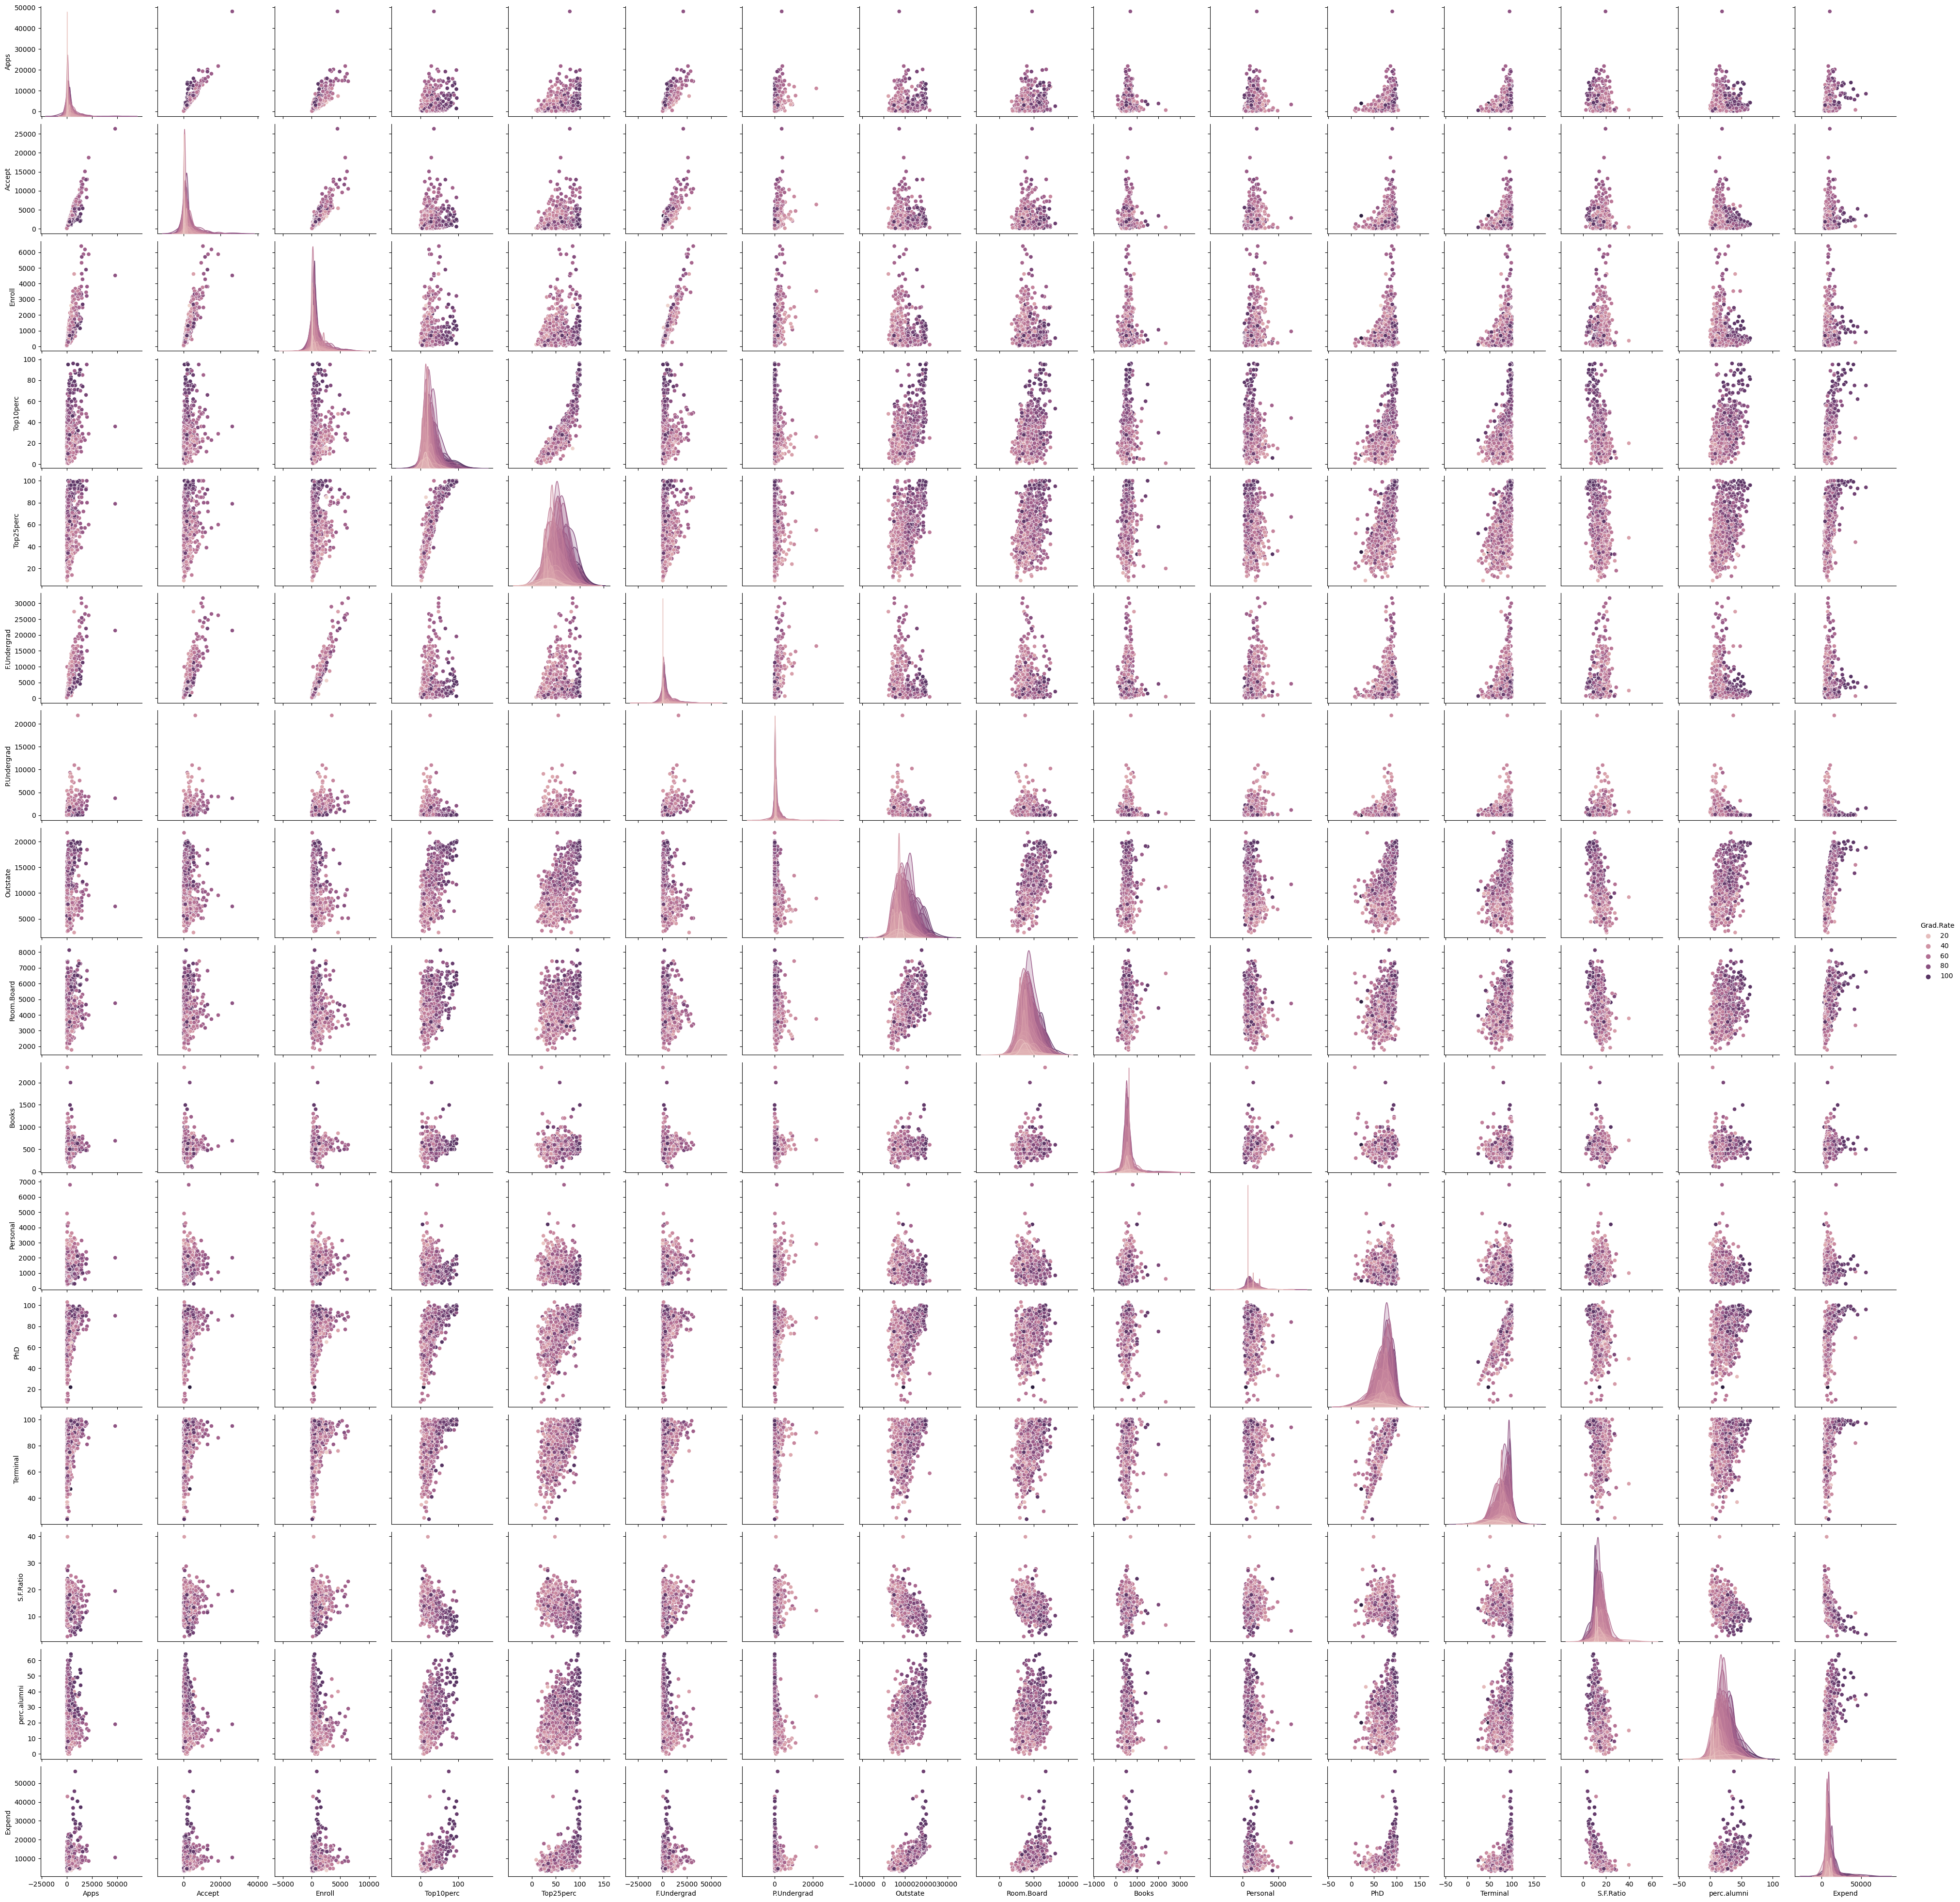

In [15]:
sns.pairplot(collegeDf, hue='Grad.Rate')

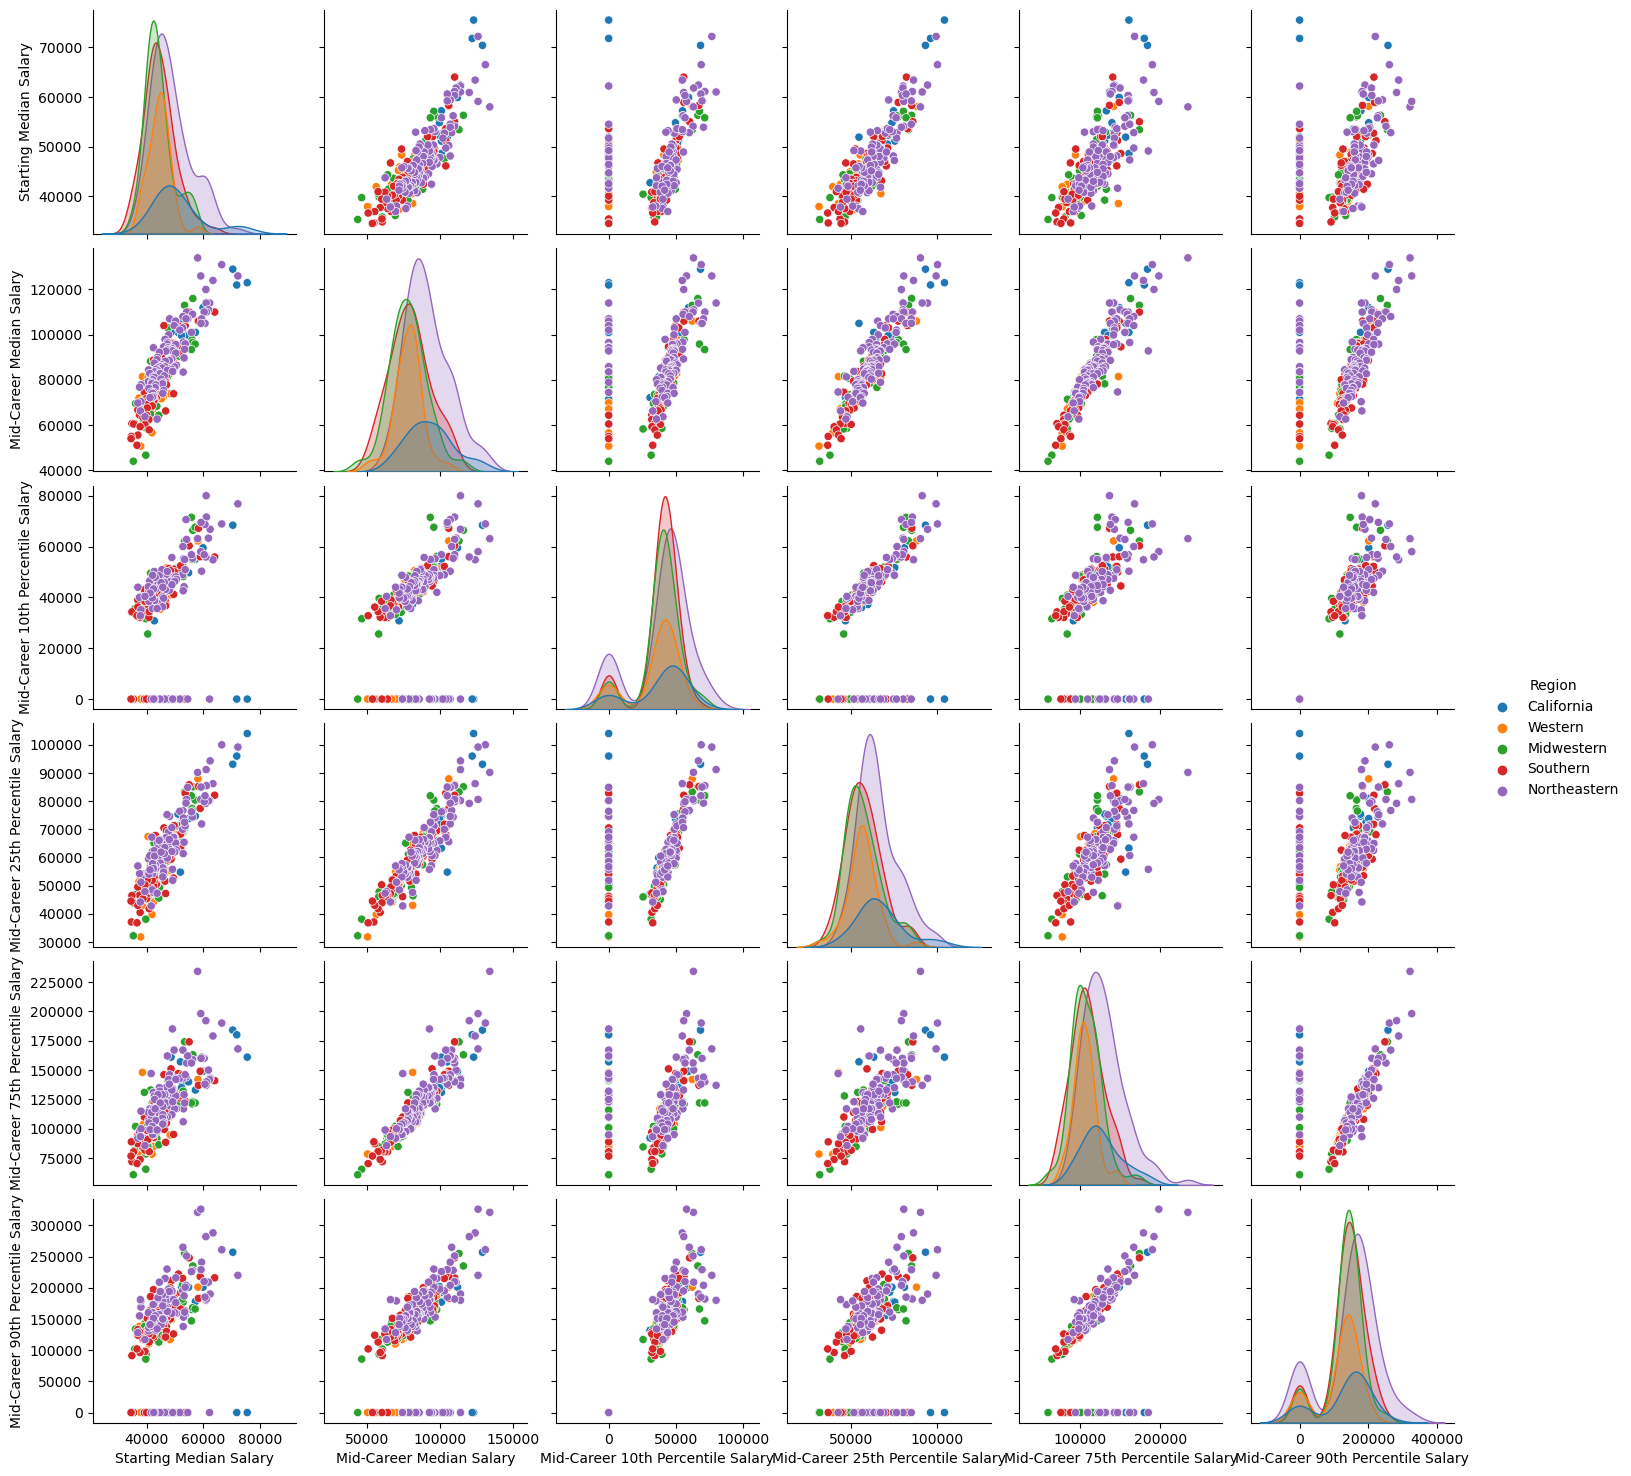

In [16]:
sns.pairplot(regionDf, hue='Region')

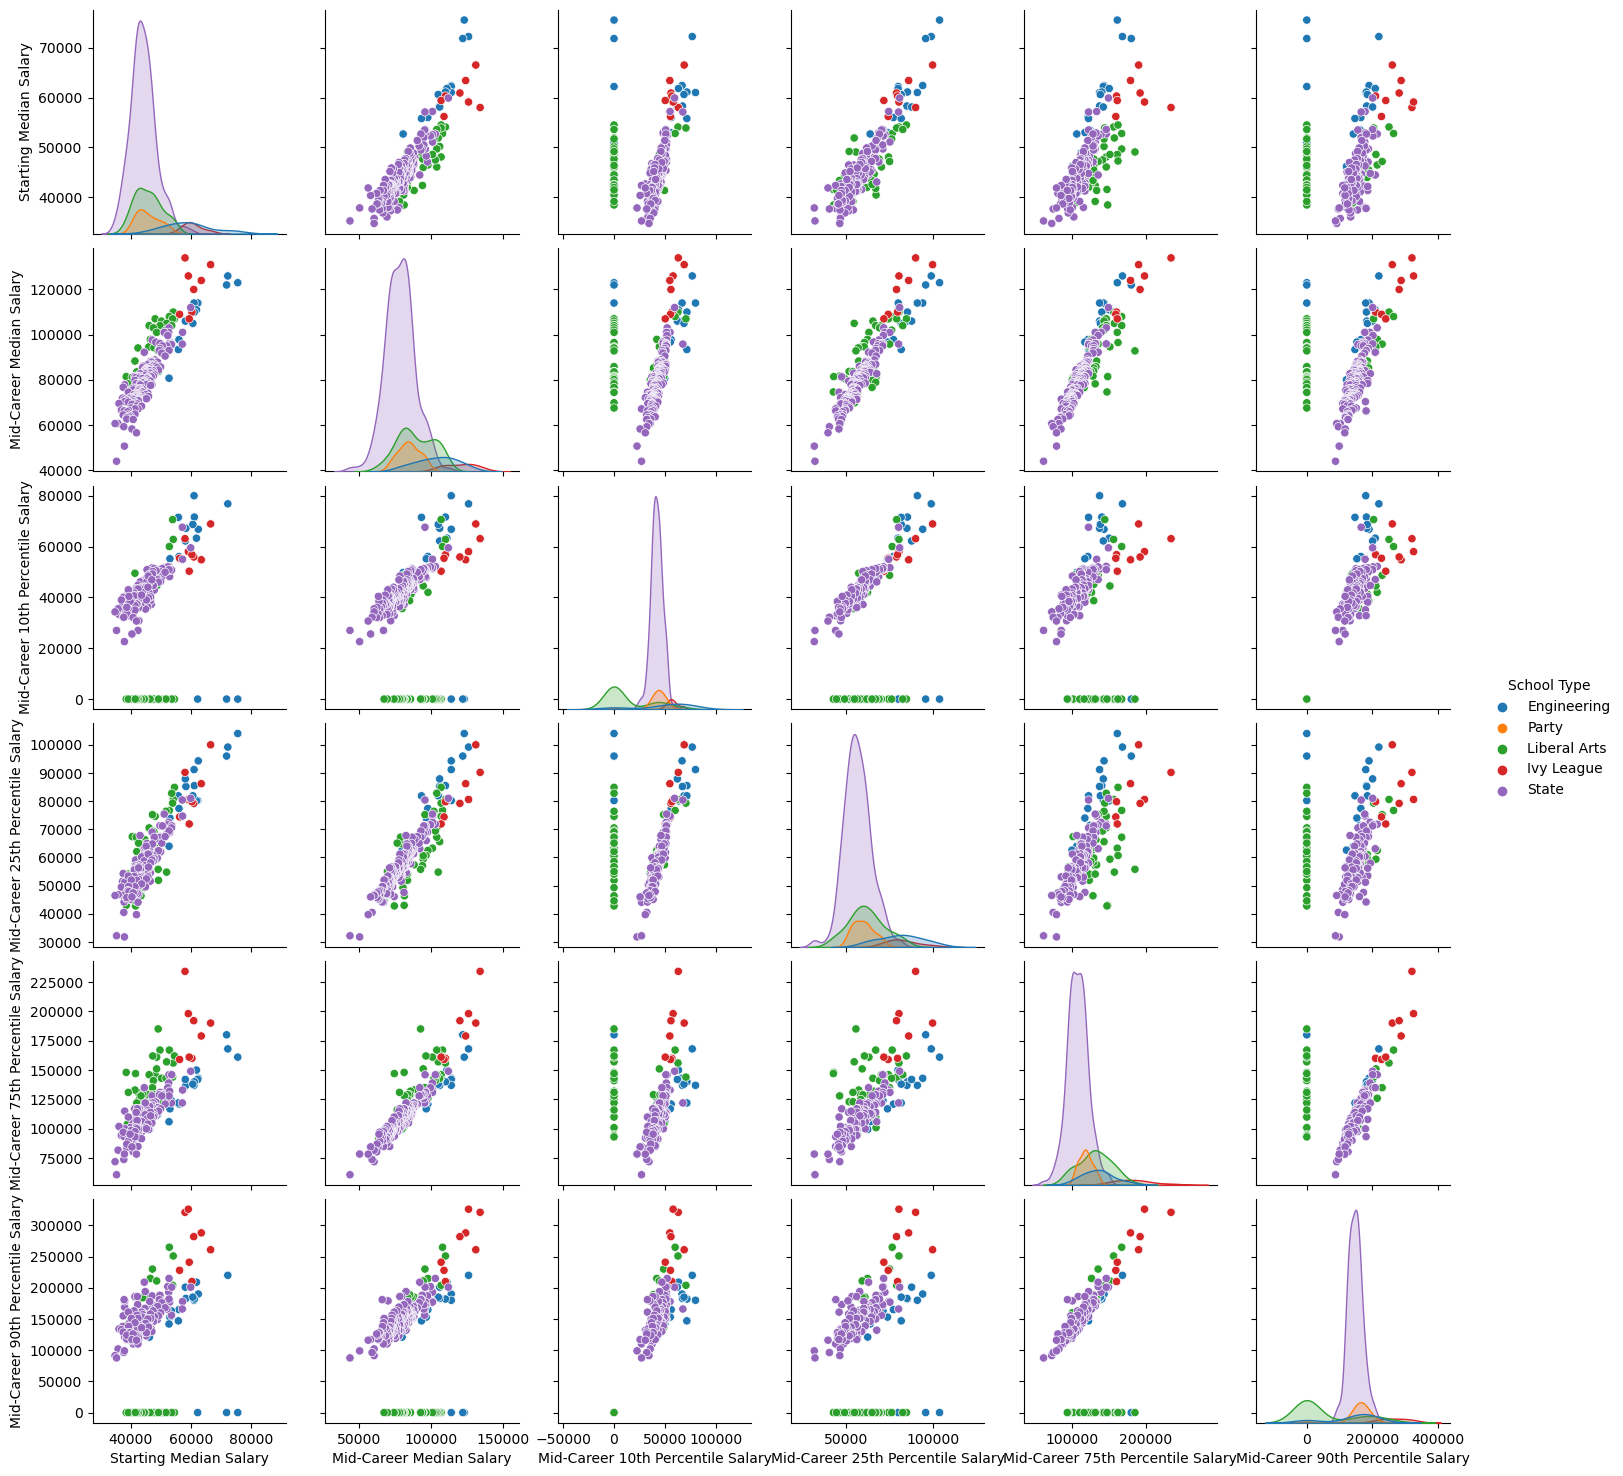

In [17]:
sns.pairplot(salaryDf, hue='School Type')

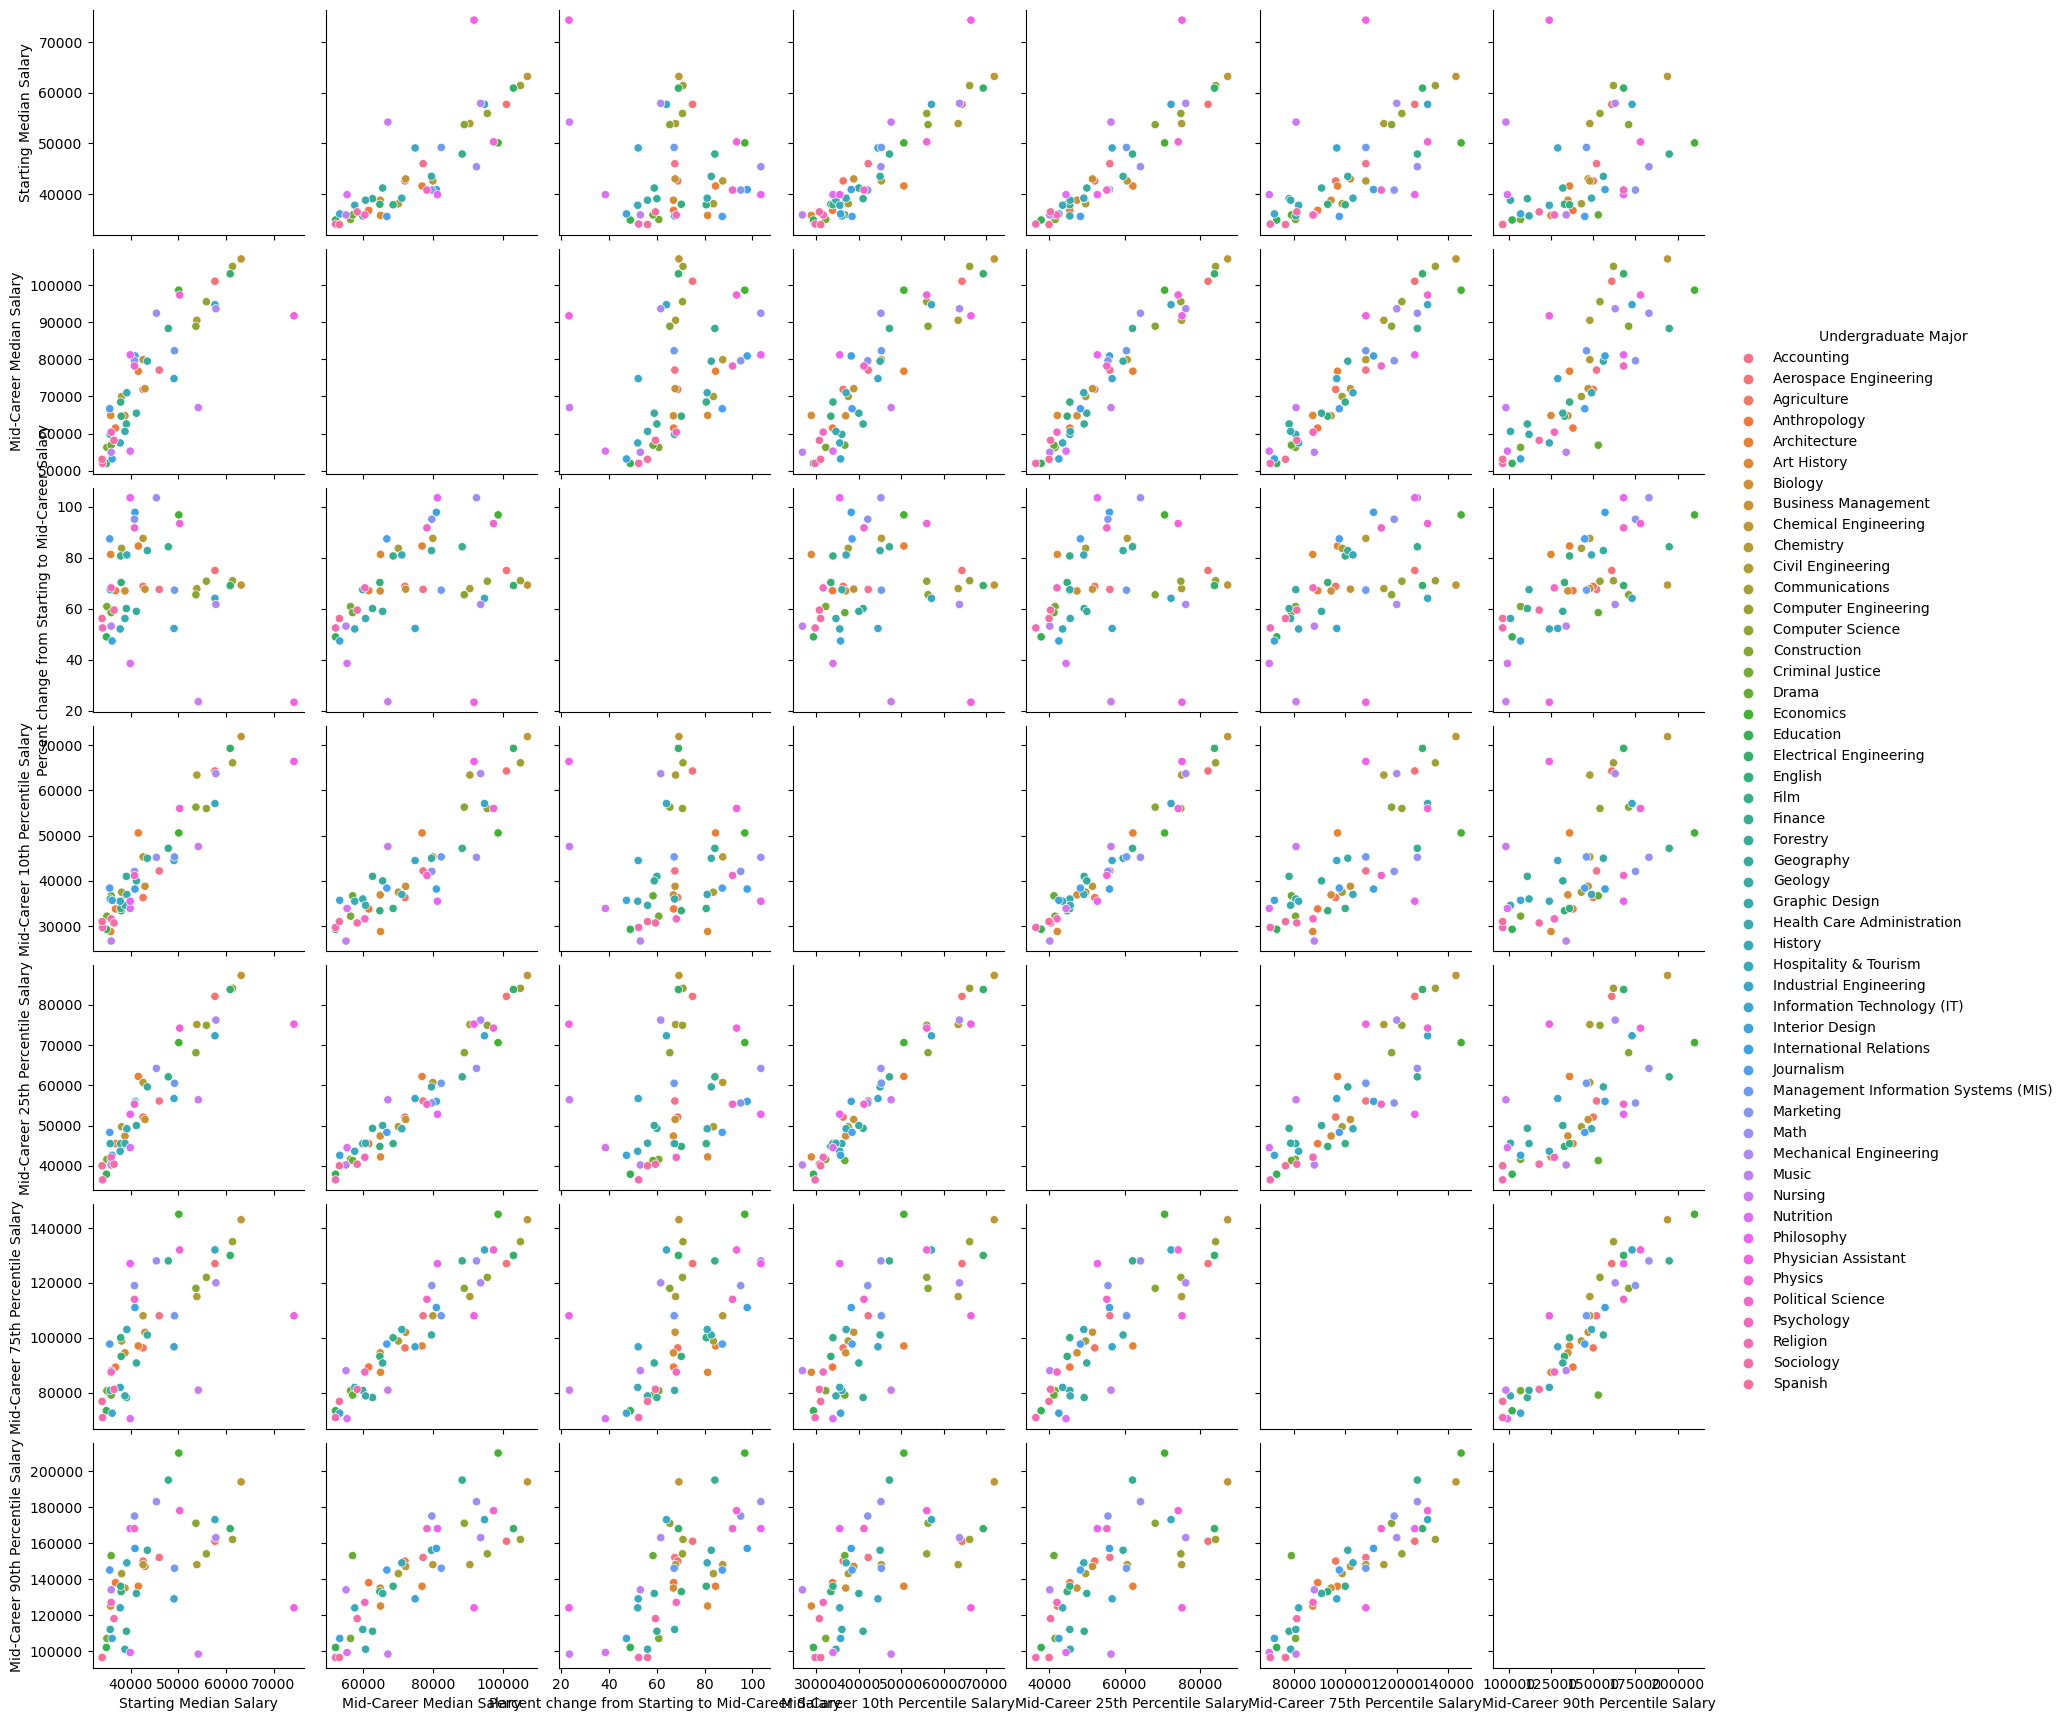

In [18]:
sns.pairplot(degreeDf, hue='Undergraduate Major')

In [19]:
numerics = collegeDf[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 
                             'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 
                             'perc.alumni', 'Expend', 'Grad.Rate']]

In [20]:
group1 = ['Room.Board', 'Outstate']
group1data = collegeDf[group1]
group1data.head()


Room.Board  Outstate
0        3300      7440
1        6450     12280
2        3750     11250
3        5450     12960
4        4120      7560

In [21]:
km = KMeans(n_clusters = 5)
km.fit(group1data)

KMeans(n_clusters=5)

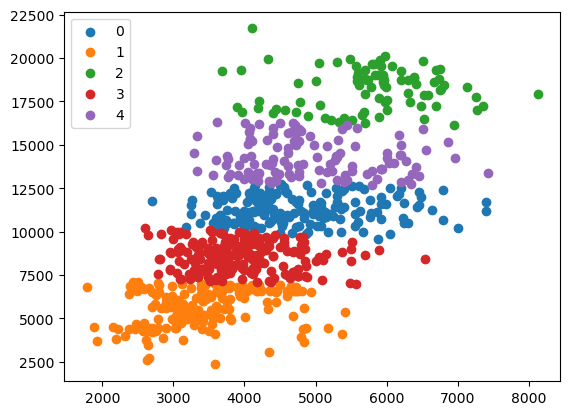

In [22]:
label = km.fit_predict(group1data)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(group1data.iloc[label == i, 0], group1data.iloc[label == i, 1], label = i)
plt.legend()
plt.show()

In [23]:
def scatterplot_with_percentile_line(data, column, index, show_percentile=False):
    """Returns a scatterplot of the salaries and the percentile of the distribution"""
        
    x = data[column]
    y = data.index
    
    plt.scatter(x,y, color='black')
    if show_percentile:
        plt.axvline(x.quantile(q=0.25), ls='--', color='red', label='25th percentile')
        plt.axvline(x.mean(), ls='--', color='orange', label='average')
        plt.axvline(x.quantile(q=0.75), ls='--', color='yellow', label='75th percentile')
        plt.axvline(x.quantile(q=0.9), ls='--', color='green', label='90th percentile')
    
    plt.xlabel('USD', weight='bold')
    plt.yticks(y, data[index])
    plt.title('{}'.format(column), size=12, weight='bold')
    plt.legend()   
    
    
def sort_and_reindex(data, column, ascending=False):
    """Function to sort the given dataframe by a certain column and reset the index."""
    df = data.sort_values(by=column, ascending=ascending)
    df.reset_index(inplace=True)
    return df

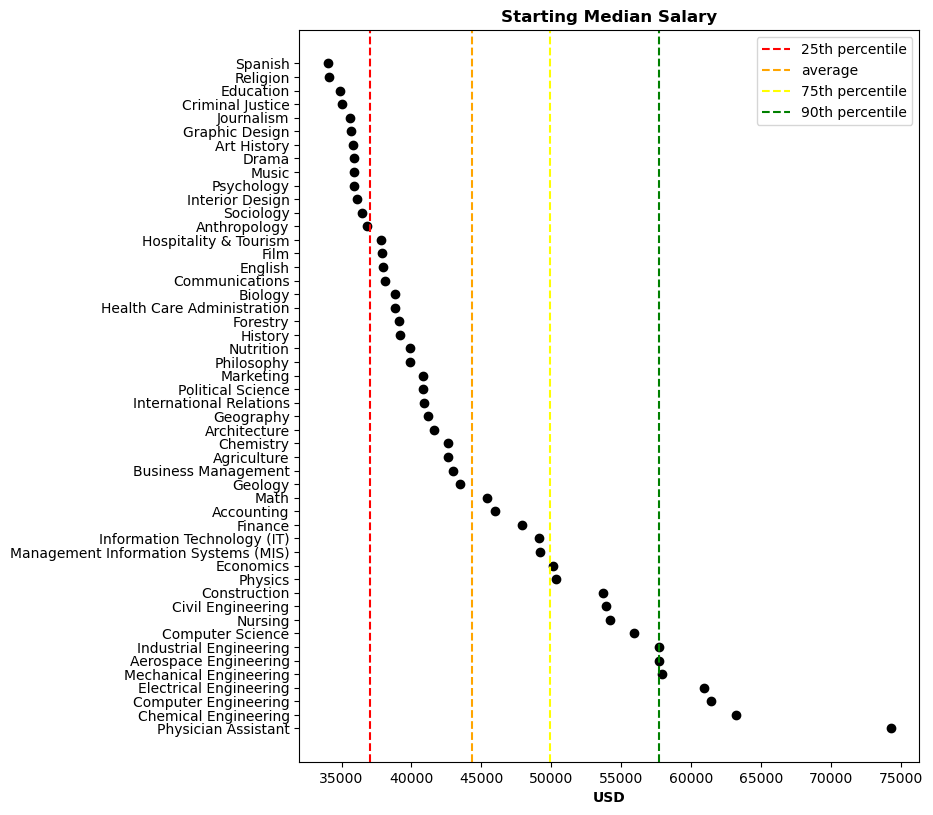

In [24]:
# Sorting by starting median salary by major
sorted_start_salary = sort_and_reindex(degreeDf, 'Starting Median Salary')
sorted_start_salary.head()

plt.figure(figsize=(8,9.5))
scatterplot_with_percentile_line(sorted_start_salary, 'Starting Median Salary', index='Undergraduate Major', show_percentile=True)

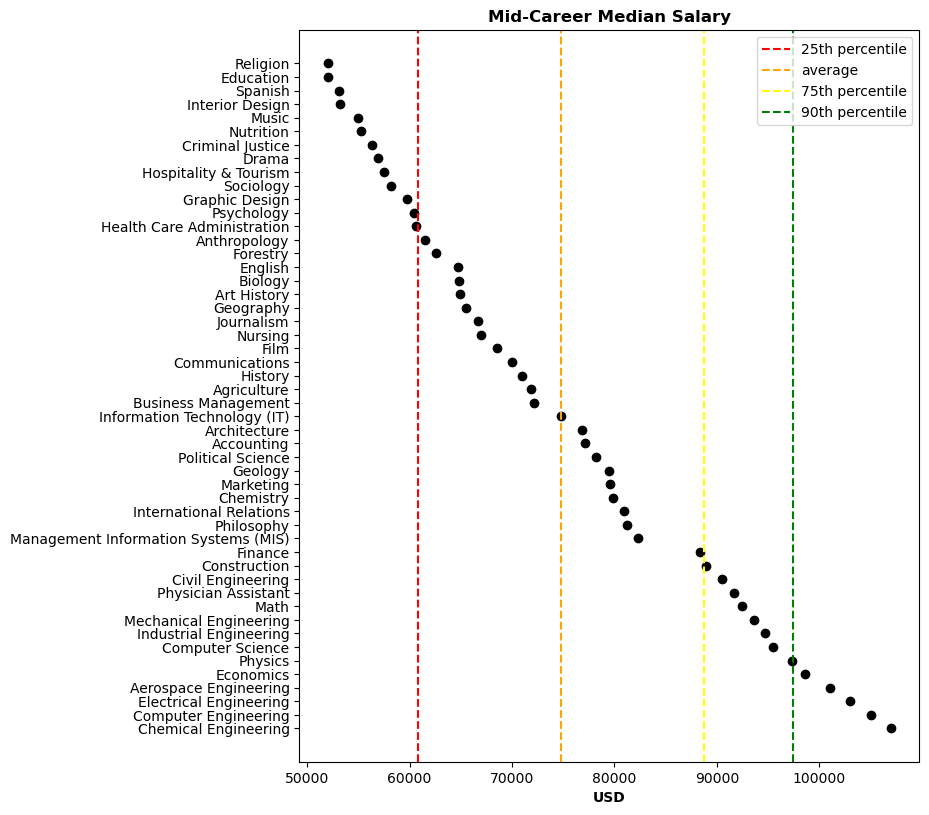

In [25]:
# Sorting by Mid-Career median salary by major
sorted_start_salary = sort_and_reindex(degreeDf, 'Mid-Career Median Salary')
sorted_start_salary.head()

plt.figure(figsize=(8,9.5))
scatterplot_with_percentile_line(sorted_start_salary, 'Mid-Career Median Salary', index='Undergraduate Major', show_percentile=True)

In [26]:
college_start_sorted = sort_and_reindex(salaryDf, 'Starting Median Salary')
college_mid_sorted = sort_and_reindex(salaryDf, 'Mid-Career Median Salary')

In [27]:
"""Looping through and determining the best and worst schools based off of type (start)"""
for school_type in ['Engineering', 'Party', 'Liberal Arts', 'State', 'Ivy League']:
    
    """Best"""
    position_best = college_start_sorted[college_start_sorted['School Type'] == school_type].head(1).index[0]
    name_best = college_start_sorted[college_start_sorted['School Type'] == school_type]['School Name'].head(1)[position_best]
    starting_salary = college_start_sorted[college_start_sorted['School Type'] == school_type]['Starting Median Salary'].head(1)[position_best] 
    print('Top {} college: {} \n\tOverall starting salary position: {}\n\tStarting salary: {} US$'.format(school_type,name_best, position_best+1, starting_salary))
    
    
    """Worst"""
    position_worst = college_start_sorted[college_start_sorted['School Type'] == school_type].tail(1).index[0]
    name_worst = college_start_sorted[college_start_sorted['School Type'] == school_type]['School Name'].tail(1)[position_worst]
    starting_salary = college_start_sorted[college_start_sorted['School Type'] == school_type]['Starting Median Salary'].tail(1)[position_worst]
    print('Worst {} college: {} \n\tOverall starting salary position: {}\n\tStarting salary: {} US$\n\n'.format(school_type,name_worst, position_worst+1, starting_salary))

Top Engineering college: California Institute of Technology (CIT) 
	Overall starting salary position: 1
	Starting salary: 75500.0 US$
Worst Engineering college: Tennessee Technological University 
	Overall starting salary position: 104
	Starting salary: 46200.0 US$


Top Party college: University of Illinois at Urbana-Champaign (UIUC) 
	Overall starting salary position: 34
	Starting salary: 52900.0 US$
Worst Party college: University of Alabama, Tuscaloosa 
	Overall starting salary position: 223
	Starting salary: 41300.0 US$


Top Liberal Arts college: Amherst College 
	Overall starting salary position: 25
	Starting salary: 54500.0 US$
Worst Liberal Arts college: Colorado College (CC) 
	Overall starting salary position: 255
	Starting salary: 38500.0 US$


Top State college: University of California, Berkeley 
	Overall starting salary position: 14
	Starting salary: 59900.0 US$
Worst State college: Morehead State University 
	Overall starting salary position: 269
	Starting salary: 34800.

In [28]:
"""Looping through and determining the best and worst schools based off of type (mid)"""
for school_type in ['Engineering', 'Party', 'Liberal Arts', 'State', 'Ivy League']:
    
    """Best"""
    position_best = college_mid_sorted[college_mid_sorted['School Type'] == school_type].head(1).index[0]
    name_best = college_mid_sorted[college_mid_sorted['School Type'] == school_type]['School Name'].head(1)[position_best]
    mid_salary = college_mid_sorted[college_mid_sorted['School Type'] == school_type]['Mid-Career Median Salary'].head(1)[position_best]
    print('Top {} college: {} \n\tOverall mid-career salary position: {}\n\tMid-career salary: {} US$'.format(school_type,name_best, position_best+1, mid_salary))    
    
    
    """Worst"""
    position_worst = college_mid_sorted[college_mid_sorted['School Type'] == school_type].tail(1).index[0]
    name_worst = college_mid_sorted[college_mid_sorted['School Type'] == school_type]['School Name'].tail(1)[position_worst]
    mid_salary = college_mid_sorted[college_mid_sorted['School Type'] == school_type]['Mid-Career Median Salary'].tail(1)[position_worst]
    print('Worst {} college: {} \n\tOverall mid-career salary position: {}\n\tMid-career salary {} US$\n\n'.format(school_type,name_worst, position_worst+1, mid_salary))

Top Engineering college: Massachusetts Institute of Technology (MIT) 
	Overall mid-career salary position: 3
	Mid-career salary: 126000.0 US$
Worst Engineering college: Tennessee Technological University 
	Overall mid-career salary position: 156
	Mid-career salary 80000.0 US$


Top Party college: University of Illinois at Urbana-Champaign (UIUC) 
	Overall mid-career salary position: 47
	Mid-career salary: 96100.0 US$
Worst Party college: Florida State University (FSU) 
	Overall mid-career salary position: 210
	Mid-career salary 73000.0 US$


Top Liberal Arts college: Bucknell University 
	Overall mid-career salary position: 16
	Mid-career salary: 110000.0 US$
Worst Liberal Arts college: Evergreen State College 
	Overall mid-career salary position: 258
	Mid-career salary 63900.0 US$


Top State college: University of California, Berkeley 
	Overall mid-career salary position: 12
	Mid-career salary: 112000.0 US$
Worst State college: Black Hills State University 
	Overall mid-career salary

In [29]:
salaries_by_college = salaryDf

school_type = salaries_by_college
school_type.sort_values(by='School Name', inplace=True)

In [30]:
salaries_by_region = regionDf

salaries_by_region.sort_values(by='School Name', inplace=True)

In [31]:
schoolRegion = school_type.merge(salaries_by_region, on='School Name')
schoolRegion.Region.unique()

array(['Northeastern', 'Southern', 'Western', 'Midwestern', 'California'],
      dtype=object)

In [32]:
Northeastern = regionDf[regionDf['Region'] == 'Northeastern']
Southern = regionDf[regionDf['Region'] == 'Southern']
Western = regionDf[regionDf['Region'] == 'Western']
Midwestern = regionDf[regionDf['Region'] == 'Midwestern']
California = regionDf[regionDf['Region'] == 'California']

Text(0, 0.5, 'USD')

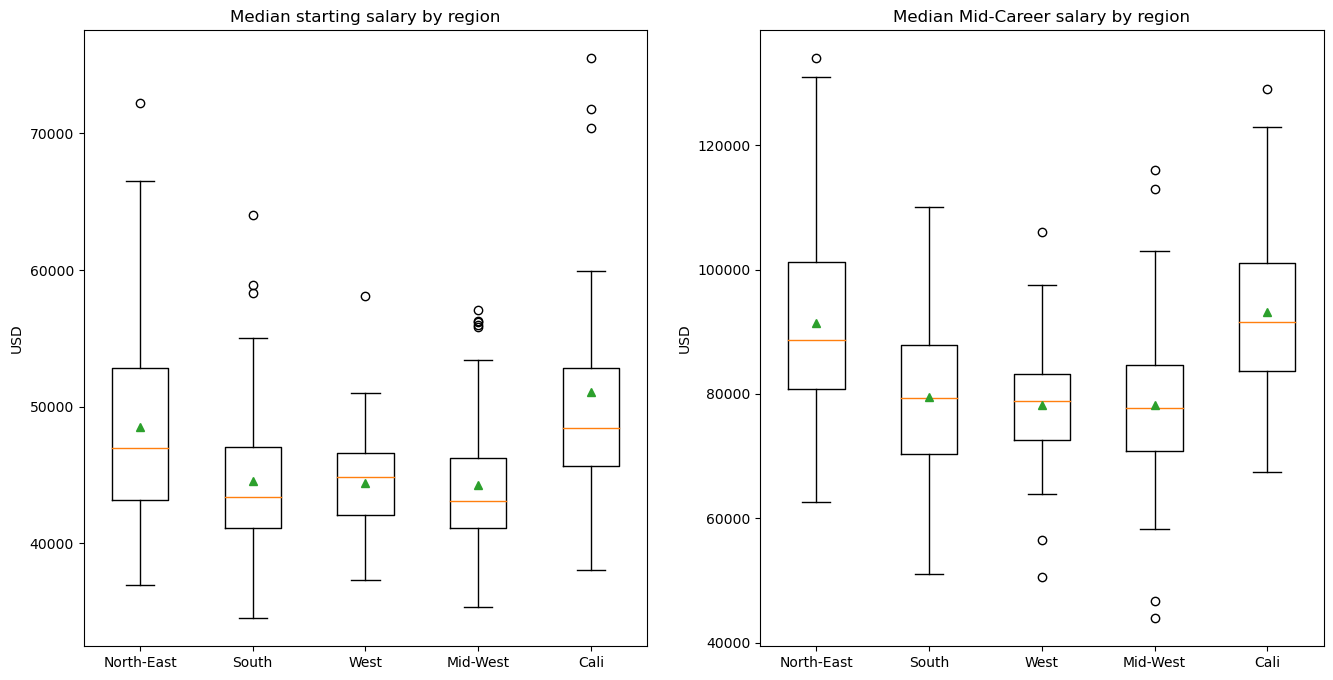

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.boxplot([Northeastern['Starting Median Salary'],Southern['Starting Median Salary'],
             Western['Starting Median Salary'], Midwestern['Starting Median Salary'], California['Starting Median Salary']],
             labels=['North-East','South','West','Mid-West','Cali'], showmeans=True)
plt.title('Median starting salary by region')
plt.ylabel('USD', rotation='vertical')

plt.subplot(1,2,2)
plt.boxplot([Northeastern['Mid-Career Median Salary'],Southern['Mid-Career Median Salary'],
             Western['Mid-Career Median Salary'], Midwestern['Mid-Career Median Salary'], California['Mid-Career Median Salary']],
             labels=['North-East','South','West','Mid-West','Cali'], showmeans=True)
plt.title('Median Mid-Career salary by region')
plt.ylabel('USD', rotation='vertical')

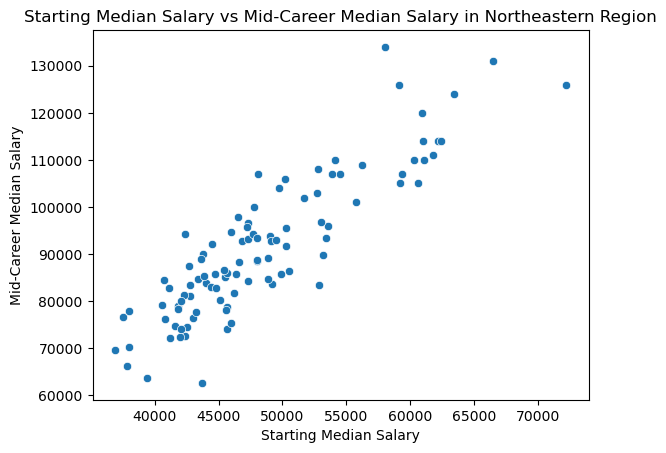

In [34]:
sns.scatterplot(data=Northeastern, x='Starting Median Salary', y='Mid-Career Median Salary')
plt.title('Starting Median Salary vs Mid-Career Median Salary in Northeastern Region')
plt.show()

In [35]:
collegeDf.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

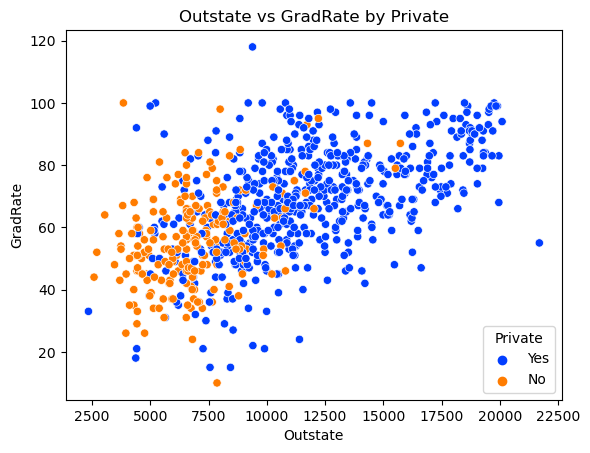

In [36]:
if 'Unnamed: 0' in collegeDf.columns:
    collegeDf.drop('Unnamed: 0', axis=1, inplace=True)

# Create a scatter plot using sns.scatterplot()
sns.scatterplot(data=collegeDf, x='Outstate', y='Grad.Rate', hue=collegeDf.Private, palette='bright')

# Set the title and axis labels using the set() method
plt.title('Outstate vs GradRate by Private')
plt.xlabel('Outstate')
plt.ylabel('GradRate')

# Display the plot
plt.show()

In [37]:
nonDroppedCollegeDf = collegeDf
collegeDfCopy.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

/Users/gavinhammersley/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


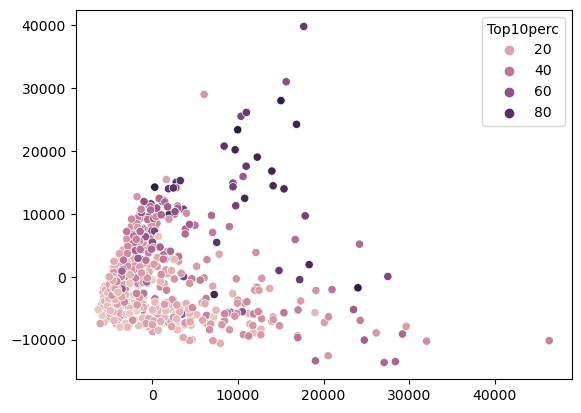

In [38]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(numerics)

sns.scatterplot(pca_results[:, 0], pca_results[:, 1], hue=collegeDf.Top10perc, legend=True)
plt.show()

/Users/gavinhammersley/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


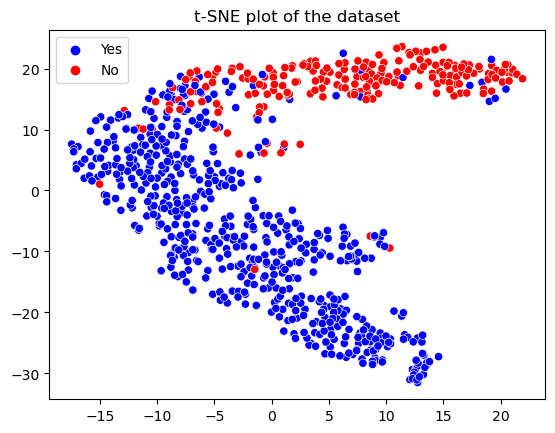

In [39]:
features = collegeDf.drop(['Private'], axis=1).values
labels = collegeDf['Private'].values

# perform t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(features)

# plot the results
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette=['blue', 'red'])
plt.title('t-SNE plot of the dataset')
plt.show()